# **Unziping Datset**

In [1]:
import zipfile

zip_file_name = '/content/fruit_dataset.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content')

# **Importing Libraries**

In [68]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Create Test and Val Generators**

In [69]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/fruit_dataset/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/fruit_dataset/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 640 files belonging to 4 classes.
Found 160 files belonging to 4 classes.


# **Normalize Images (make pixel Values b/w 0 and 1)**

In [70]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Create CNN Model**

In [81]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 128)      

In [83]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
20/20 [==============================] - 5s 88ms/step - loss: 1.8329 - accuracy: 0.2719 - val_loss: 1.2882 - val_accuracy: 0.4000
Epoch 2/10
20/20 [==============================] - 2s 97ms/step - loss: 1.2453 - accuracy: 0.3938 - val_loss: 1.1023 - val_accuracy: 0.5688
Epoch 3/10
20/20 [==============================] - 2s 91ms/step - loss: 1.0043 - accuracy: 0.5688 - val_loss: 0.9441 - val_accuracy: 0.5813
Epoch 4/10
20/20 [==============================] - 2s 101ms/step - loss: 0.8437 - accuracy: 0.6547 - val_loss: 0.7990 - val_accuracy: 0.7000
Epoch 5/10
20/20 [==============================] - 2s 83ms/step - loss: 0.7140 - accuracy: 0.7109 - val_loss: 0.7900 - val_accuracy: 0.6750
Epoch 6/10
20/20 [==============================] - 2s 102ms/step - loss: 0.5856 - accuracy: 0.7969 - val_loss: 0.7922 - val_accuracy: 0.7125
Epoch 7/10
20/20 [==============================] - 5s 223ms/step - loss: 0.4815 - accuracy: 0.8188 - val_loss: 0.8449 - val_accuracy: 0.6938
Epoch 8/10

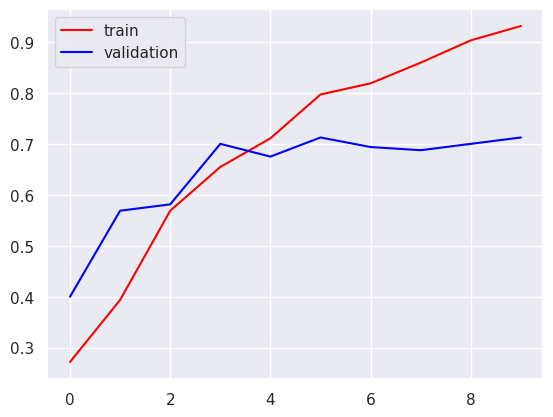

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

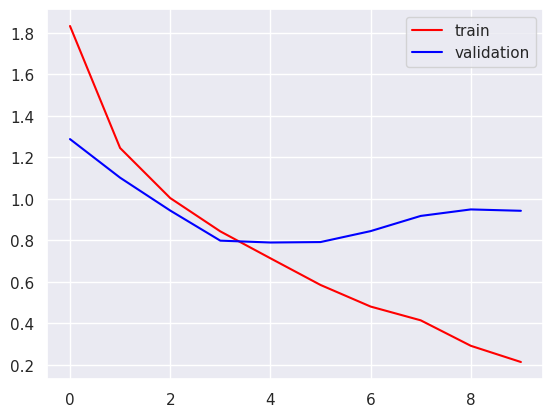

In [86]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Confusion Matrix**

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [77]:
y_true = []
y_pred = []

In [78]:
for images, labels in validation_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 30ms/step


Text(45.722222222222214, 0.5, 'Actual')

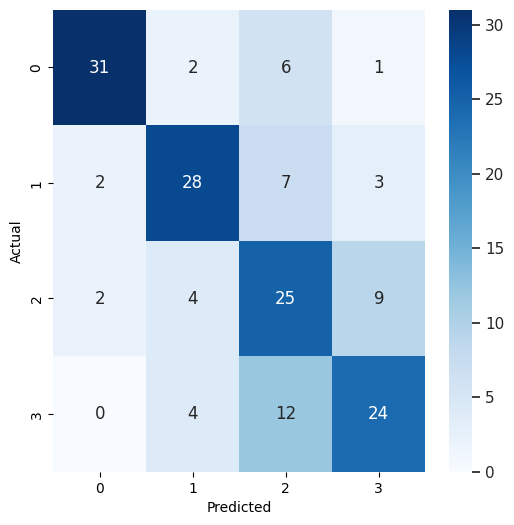

In [80]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

**Adding a Dropout:**

1/1 [==============================] - 0s 128ms/step


Text(41.25, 0.5, 'Actual')

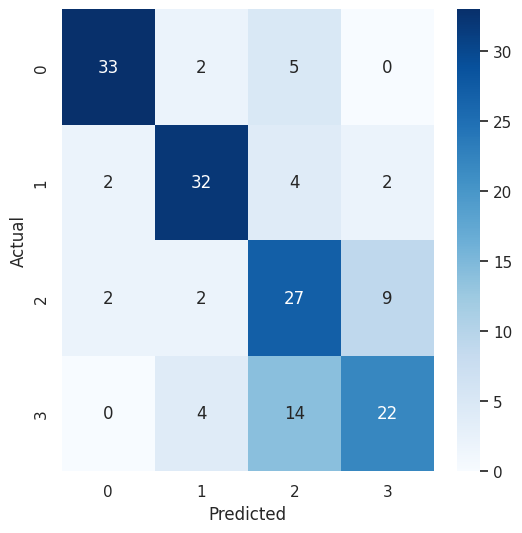

In [87]:
y_true = []
y_pred = []

for images, labels in validation_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# **Make Predictions**

In [88]:
import cv2

In [89]:
test_img = cv2.imread('/content/apple_test.jpg')

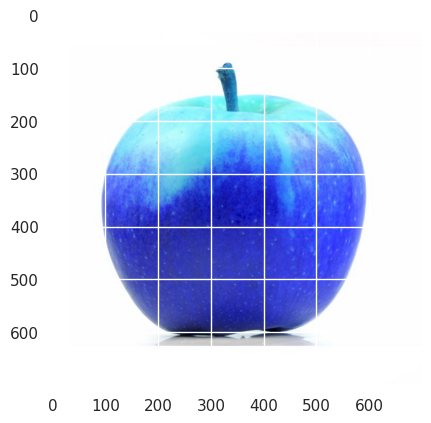

In [90]:
plt.imshow(test_img)

In [91]:
test_img.shape

(700, 700, 3)

In [92]:
test_img = cv2.resize(test_img,(256,256))

In [93]:
test_input = test_img.reshape((1,256,256,3))

In [94]:
model.predict(test_input)

1/1 [==============================] - 0s 76ms/step


array([[1., 0., 0., 0.]], dtype=float32)

# **Further Improvements (Use augmentation)**

In [95]:
from keras.preprocessing.image import ImageDataGenerator

In [96]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fruit_dataset/Train',
    target_size= (256, 256),
    batch_size= batch_size,
    class_mode= 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/fruit_dataset/Test',
    target_size= (256, 256),
    batch_size= batch_size,
    class_mode= 'categorical'
)

Found 640 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [97]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))

In [98]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 128)     

In [99]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
history2 = model2.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
40/40 [==============================] - 14s 232ms/step - loss: 1.3366 - accuracy: 0.3500 - val_loss: 1.1078 - val_accuracy: 0.4125
Epoch 2/10
40/40 [==============================] - 11s 283ms/step - loss: 1.0373 - accuracy: 0.5047 - val_loss: 1.0005 - val_accuracy: 0.5938
Epoch 3/10
40/40 [==============================] - 12s 306ms/step - loss: 0.8305 - accuracy: 0.6219 - val_loss: 0.8923 - val_accuracy: 0.6562
Epoch 4/10
40/40 [==============================] - 13s 333ms/step - loss: 0.7177 - accuracy: 0.7281 - val_loss: 0.8067 - val_accuracy: 0.6938
Epoch 5/10
40/40 [==============================] - 11s 276ms/step - loss: 0.5695 - accuracy: 0.7703 - val_loss: 1.4811 - val_accuracy: 0.6250
Epoch 6/10
40/40 [==============================] - 11s 262ms/step - loss: 0.6749 - accuracy: 0.7391 - val_loss: 0.7839 - val_accuracy: 0.7188
Epoch 7/10
40/40 [==============================] - 11s 268ms/step - loss: 0.5292 - accuracy: 0.8016 - val_loss: 0.8080 - val_accuracy: 0.7312

We can observe that adding only one dropout and augmenting the data increased our validation accuracy significantly

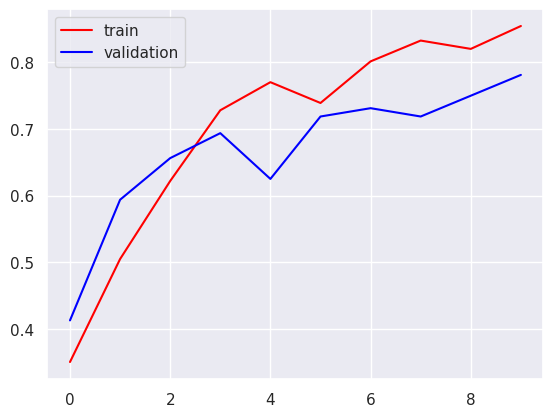

In [101]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

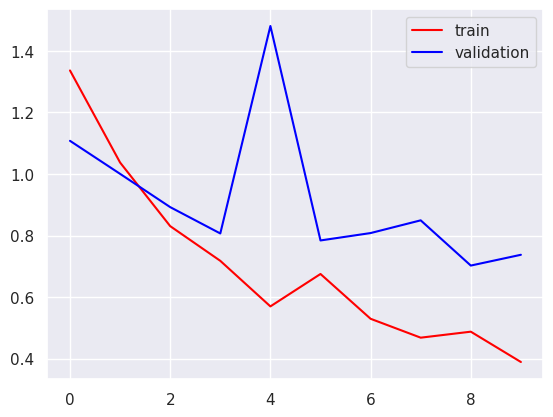

In [102]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 163ms/step


Text(41.25, 0.5, 'Actual')

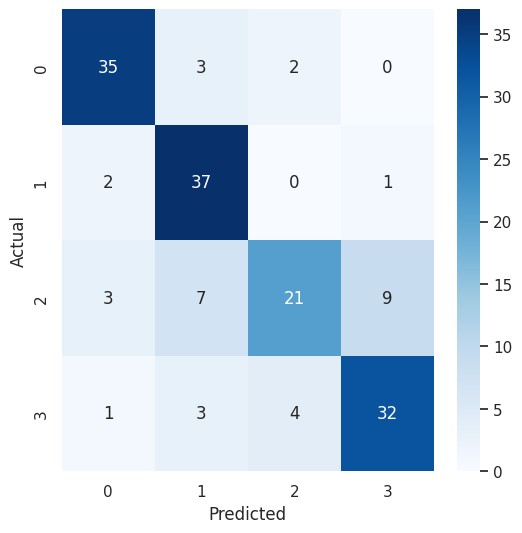

In [104]:
y_true = []
y_pred = []

for images, labels in validation_ds:
    predictions = model2.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

1/1 [==============================] - 0s 82ms/step


array([[1., 0., 0., 0.]], dtype=float32)

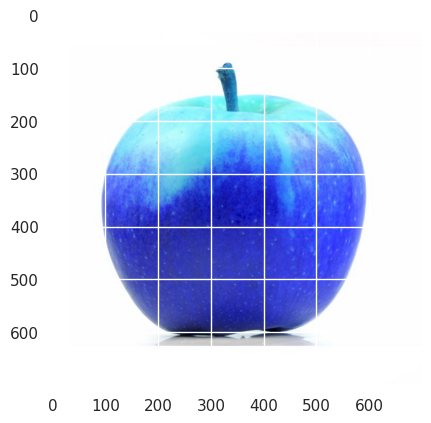

In [106]:
test_img = cv2.imread('/content/apple_test.jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model2.predict(test_input)

# **Use Regularization to reduce Overfitting**

In [126]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model3.add(Dense(4, activation='softmax'))

In [127]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 128)     

In [128]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [129]:
history3 = model3.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
40/40 [==============================] - 14s 284ms/step - loss: 3.3536 - accuracy: 0.4406 - val_loss: 2.5544 - val_accuracy: 0.5813
Epoch 2/15
40/40 [==============================] - 11s 269ms/step - loss: 2.0670 - accuracy: 0.6703 - val_loss: 1.7703 - val_accuracy: 0.7437
Epoch 3/15
40/40 [==============================] - 11s 265ms/step - loss: 1.4809 - accuracy: 0.7609 - val_loss: 1.6527 - val_accuracy: 0.6875
Epoch 4/15
40/40 [==============================] - 10s 245ms/step - loss: 1.2007 - accuracy: 0.7891 - val_loss: 1.4563 - val_accuracy: 0.7188
Epoch 5/15
40/40 [==============================] - 11s 267ms/step - loss: 0.9623 - accuracy: 0.8531 - val_loss: 1.2439 - val_accuracy: 0.7812
Epoch 6/15
40/40 [==============================] - 11s 267ms/step - loss: 0.8412 - accuracy: 0.8703 - val_loss: 1.1646 - val_accuracy: 0.7750
Epoch 7/15
40/40 [==============================] - 9s 231ms/step - loss: 0.7490 - accuracy: 0.8656 - val_loss: 1.2102 - val_accuracy: 0.8000


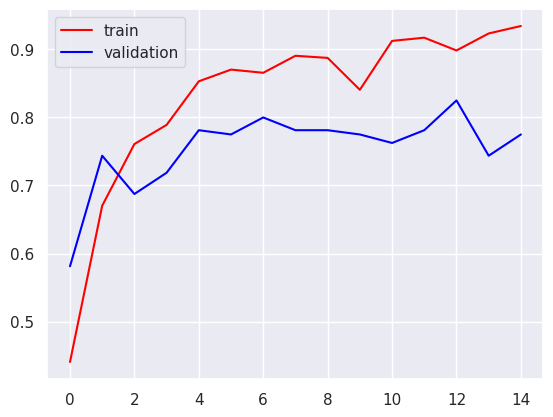

In [130]:
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'],color='red',label='train')
plt.plot(history3.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

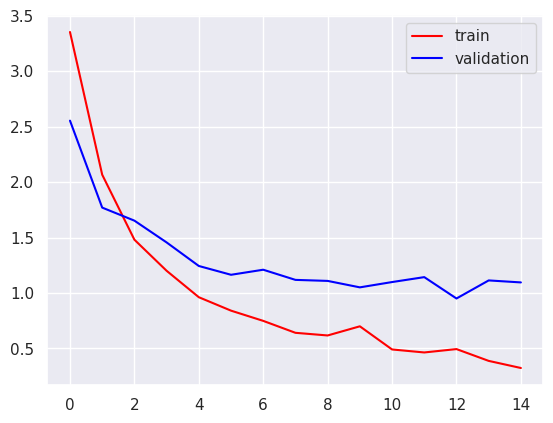

In [131]:
plt.plot(history3.history['loss'],color='red',label='train')
plt.plot(history3.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 29ms/step


Text(41.25, 0.5, 'Actual')

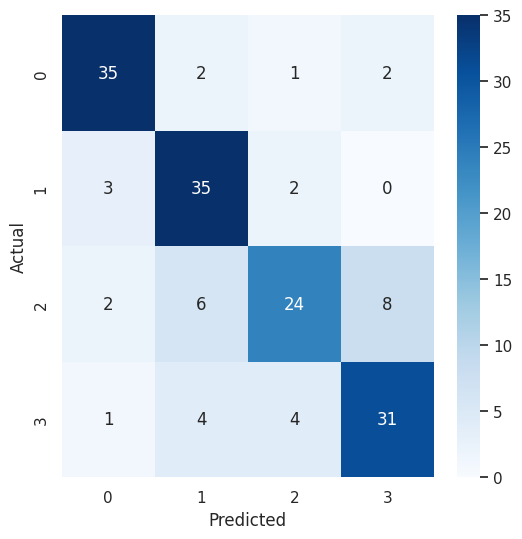

In [132]:
y_true = []
y_pred = []

for images, labels in validation_ds:
    predictions = model3.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

1/1 [==============================] - 0s 74ms/step


array([[0., 1., 0., 0.]], dtype=float32)

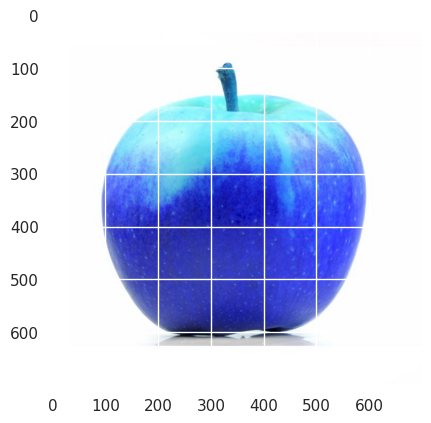

In [133]:
test_img = cv2.imread('/content/apple_test.jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model3.predict(test_input)